In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display_image(title, image):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

**1. Simulation and Display of an Image, Negative of an Image(Binary & Gray Scale)**

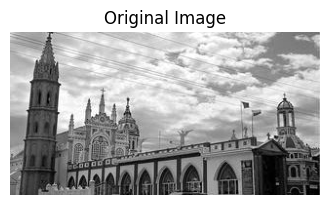

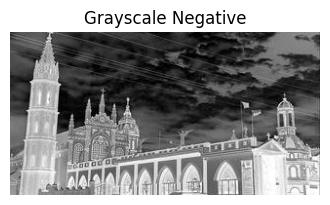

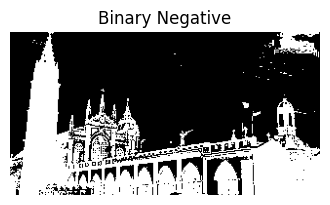

In [6]:
image = cv2.imread('church.jpg', cv2.IMREAD_GRAYSCALE)
gray_negative = 255 - image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_negative = 255 - binary_image
display_image('Original Image', image)
display_image('Grayscale Negative', gray_negative)
display_image('Binary Negative', binary_negative)

**2. Contrast stretching of a low contrast image, Histogram, and Histogram Equalization**

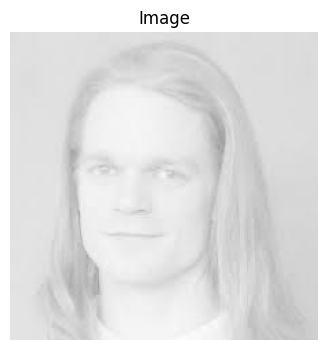

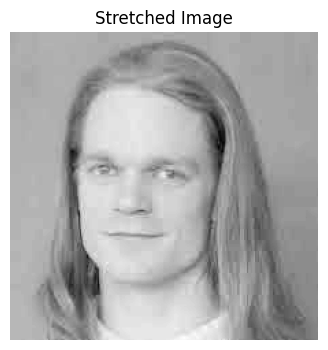

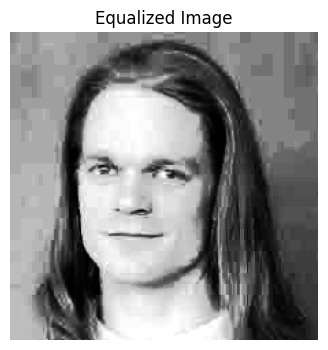

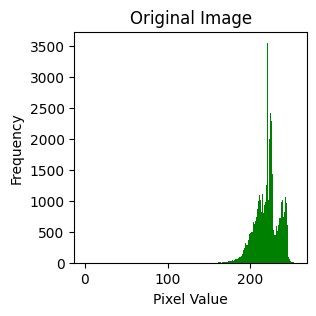

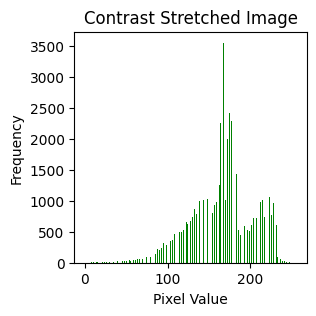

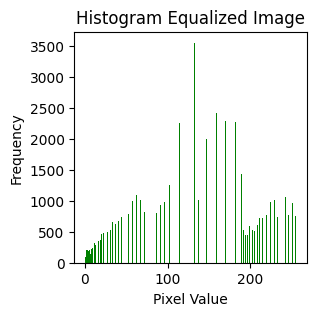

In [8]:
image = cv2.imread('image3.jpeg', cv2.IMREAD_GRAYSCALE)
M1_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image('Image', M1_rgb)
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * (255 / (max_val - min_val))
    return stretched.astype(np.uint8)
stretched_image = contrast_stretching(image)
display_image('Stretched Image', stretched_image)
equalized_image = cv2.equalizeHist(image)
display_image('Equalized Image', equalized_image)
def plot_histogram(image, title):
    plt.figure(figsize=(3,3))
    plt.hist(image.ravel(), bins=256, range=[0,256], color='green')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
plot_histogram(image, 'Original Image')
plot_histogram(stretched_image, 'Contrast Stretched Image')
plot_histogram(equalized_image, 'Histogram Equalized Image')

**3. Implementation of Transformations of an Image**

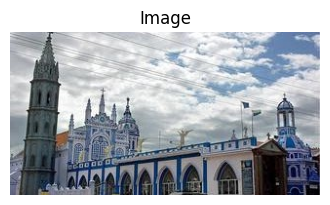

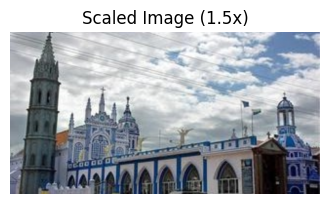

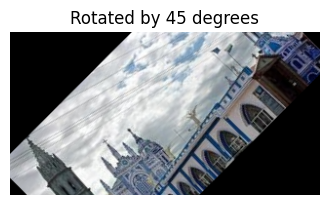

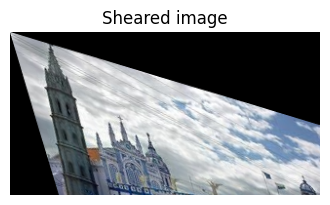

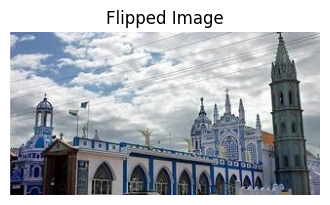

In [9]:
image = cv2.imread('church.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image('Image', image)
image.shape
h, w, _ = image.shape
scaled_image = cv2.resize(image, (int(w * 1.5), int(h * 1.5)), interpolation=cv2.INTER_LINEAR)
display_image('Scaled Image (1.5x)', scaled_image)
scaled_image.shape
center = (w//2, h//2)
angle = 45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
display_image('Rotated by 45 degrees', rotated_image)
shear_factor = 0.3
shear_matrix = np.float32([[1, shear_factor, 0], [shear_factor, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (w, h))
display_image('Sheared image', sheared_image)
flipped_image = cv2.flip(image, 1)
display_image('Flipped Image', flipped_image)

**4. Implementation of Relationships between Pixels**

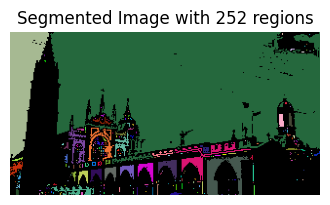

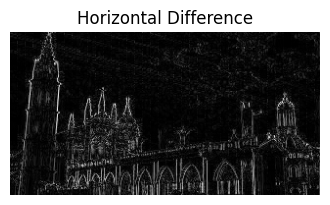

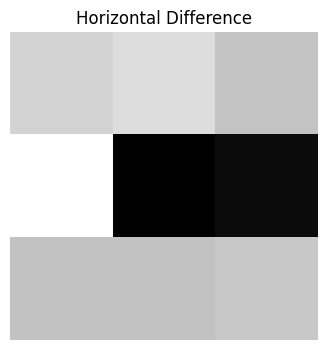

In [15]:
image = cv2.imread('church.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(binary_image)
output_image = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
colors = [np.random.randint(0, 255, 3) for _ in range(num_labels)]
for y in range(labels.shape[0]):
    for x in range(labels.shape[1]):
        if labels[y, x] > 0:
            output_image[y, x] = colors[labels[y, x]]
display_image(f'Segmented Image with {num_labels - 1} regions', output_image)

diff_x = cv2.absdiff(image[:, 1:], image[:, :-1])
display_image('Horizontal Difference', diff_x)

center_pixel = (100, 100) 
x, y = center_pixel
neighborhood = image[x-1:x+2, y-1:y+2]
center_intensity = image[x, y]
intensity_diff = neighborhood - center_intensity

display_image('Horizontal Difference', intensity_diff)


**5. Display of bit planes of an Image**

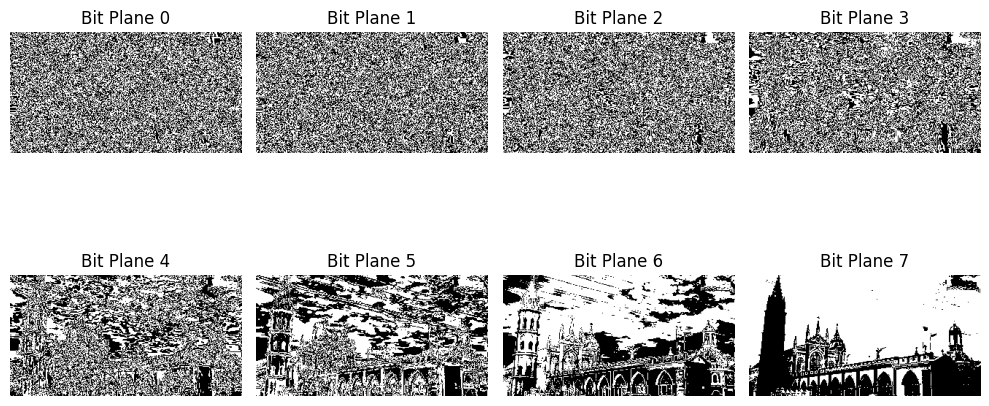

In [11]:
rows, cols = image.shape
bit_planes = []
for i in range(8):
    bit_plane = (image >> i) & 1
    bit_planes.append((bit_plane * 255).astype(np.uint8))
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

**6. Display of FFT(1-D & 2-D) of an image**

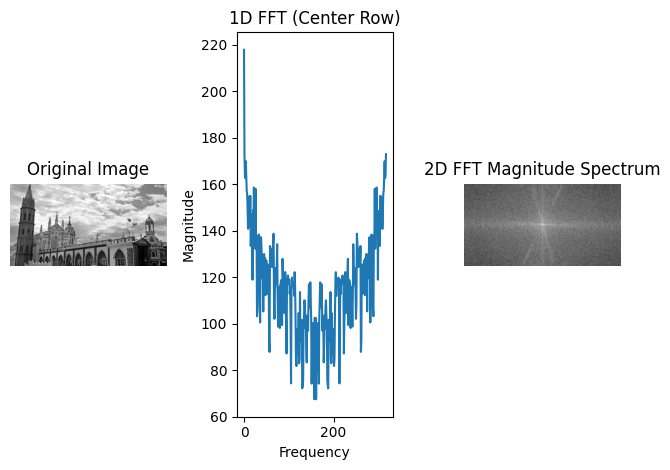

In [12]:
row = image[image.shape[0] // 2, :]
f_transform_1d = np.fft.fft(row)
magnitude_spectrum_1d = 20 * np.log(np.abs(f_transform_1d) + 1)

f_transform = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shifted) + 1) 

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(magnitude_spectrum_1d)
plt.title('1D FFT (Center Row)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('2D FFT Magnitude Spectrum')
plt.axis('off')
plt.tight_layout()
plt.show()

**7. Computation of Mean, Standard Deviation, Correlation coefficient of the given Image**

In [13]:
mean = np.mean(image)
std_dev = np.std(image)
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
shifted_image = np.roll(image, 1, axis=1)
correlation_coefficient = np.corrcoef(image.flatten(), shifted_image.flatten())[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Mean: 150.22
Standard Deviation: 68.97
Correlation Coefficient: 0.94


**8. Write a program that applies the Sobel filter to an image and displays the detected edges. Use both horizontal and vertical Sobel kernels to compute the gradient magnitude.**

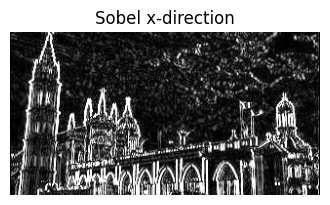

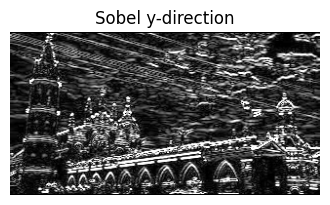

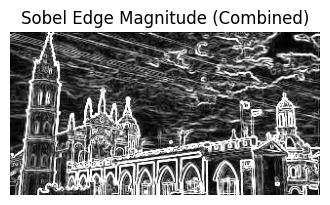

In [16]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
s_gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
s_gradient_magnitude = cv2.convertScaleAbs(s_gradient_magnitude)
display_image('Sobel x-direction', sobel_x)
display_image('Sobel y-direction', sobel_y)
display_image('Sobel Edge Magnitude (Combined)', s_gradient_magnitude)

**9. Write a program that applies the Prewitt filter for both horizontal and vertical gradients, and computes the edge map of the image.**

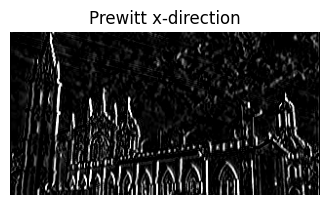

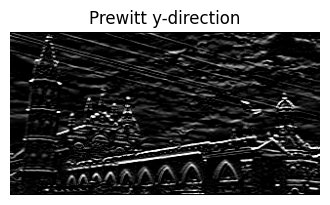

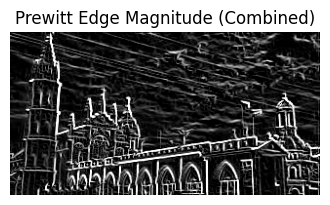

In [17]:
prewitt_x = cv2.filter2D(image, -1, np.array([[-1,0,1], [-1,0,1], [-1,0,1]]))
prewitt_y = cv2.filter2D(image, -1, np.array([[1,1,1], [0,0,0], [-1,-1,-1]]))
p_gradient_magnitude = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))
sobel_x = cv2.convertScaleAbs(prewitt_x)
sobel_y = cv2.convertScaleAbs(prewitt_y)
p_gradient_magnitude = cv2.convertScaleAbs(p_gradient_magnitude)
display_image('Prewitt x-direction', prewitt_x)
display_image('Prewitt y-direction', prewitt_y)
display_image('Prewitt Edge Magnitude (Combined)', p_gradient_magnitude)

**10. Apply the Canny edge detection algorithm on a sample image, fine-tuning the threshold values to achieve the best result.**

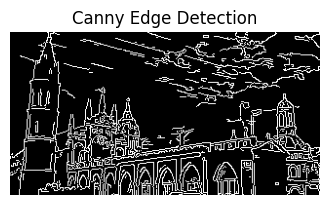

In [18]:
canny_image = cv2.Canny(image, 127, 255)
display_image('Canny Edge Detection', canny_image)

**11. Implement edge detection on a noisy image using different filters and compare their performance.**

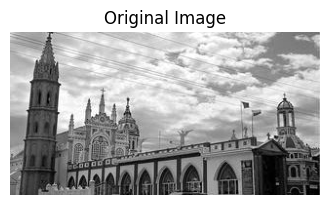

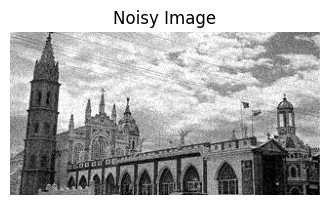

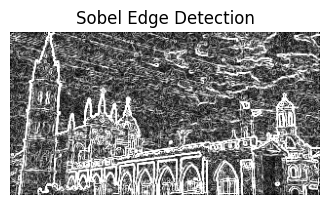

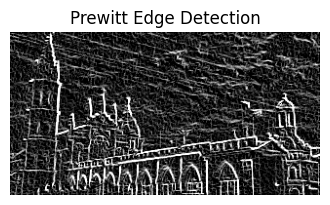

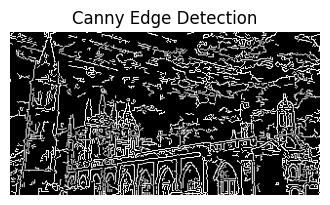

In [19]:
gaussian_noise = np.random.normal(0, 15, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
display_image('Original Image', image)
display_image('Noisy Image', noisy_image)
sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
s_gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)
s_gradient_magnitude = cv2.convertScaleAbs(s_gradient_magnitude)
display_image('Sobel Edge Detection', s_gradient_magnitude)
prewitt_x = cv2.filter2D(noisy_image, -1, np.array([[-1,0,1], [-1,0,1], [-1,0,1]]))
prewitt_y = cv2.filter2D(noisy_image, -1, np.array([[1,1,1], [0,0,0], [-1,-1,-1]]))
p_gradient_magnitude = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))
p_gradient_magnitude = cv2.convertScaleAbs(p_gradient_magnitude)
display_image('Prewitt Edge Detection', p_gradient_magnitude)
canny_image = cv2.Canny(noisy_image, 127, 255)
display_image('Canny Edge Detection', canny_image)

**12. Apply all three filters (averaging, Gaussian, and median) to a noisy image and compare the smoothed results.**

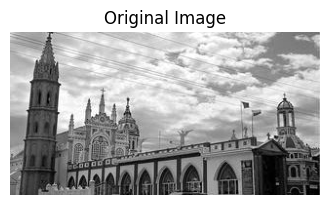

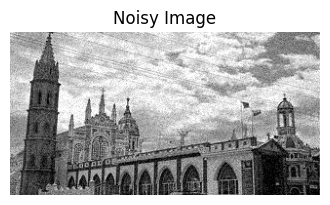

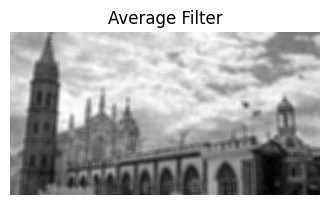

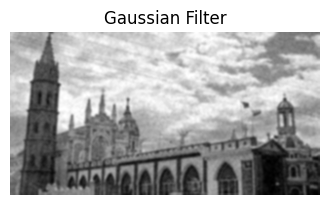

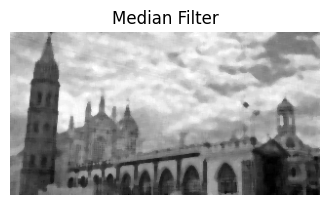

In [20]:
gaussian_noise = np.random.normal(0, 15, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
display_image('Original Image', image)
display_image('Noisy Image', noisy_image)
avg_filtered = cv2.blur(noisy_image, (5, 5))
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_filtered = cv2.medianBlur(noisy_image, 5)
display_image('Average Filter',  avg_filtered)
display_image('Gaussian Filter',  gaussian_filtered)
display_image('Median Filter',  median_filtered)

**13. Apply smoothing filters (Gaussian, median) to an edge detection algorithm**

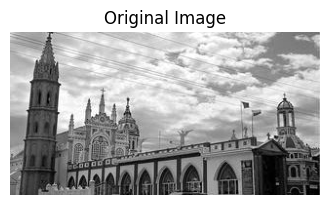

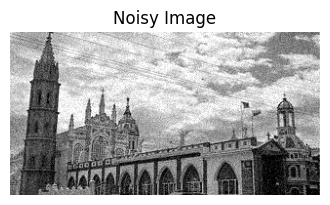

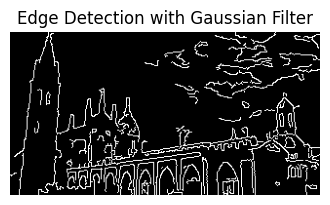

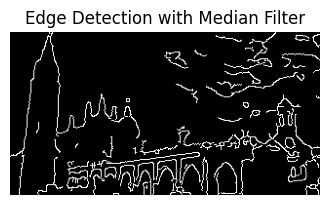

In [22]:
gaussian_noise = np.random.normal(0, 15, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
display_image('Original Image', image)
display_image('Noisy Image', noisy_image)
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_filtered = cv2.medianBlur(noisy_image, 5)
edges_gaussian = cv2.Canny(gaussian_filtered, 100, 200)
edges_median = cv2.Canny(median_filtered, 100, 200)
display_image('Edge Detection with Gaussian Filter', edges_gaussian)
display_image('Edge Detection with Median Filter', edges_median)